## Calculations of SGR1935 rate constraints at different fluences.

The first detection of SGR1935 FRB was ST 200428A (2020), which recorded a fluence of 1.5 MJy$\cdot$ms. This serves as our reference for rate calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.optimize

plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [2]:
# volumetric rate for bursts with energy releases equivalent to (or greater) than ST 200428A
R_vol = 7.23e7*u.Gpc**(-3)*u.yr**(-1)

V_MW = 1e-7*u.Gpc**3 # Milky Way volume

In [3]:
R_MJy_level = R_vol*V_MW
R_MJy_level # for all magnetars w/in MW

<Quantity 7.23 1 / yr>

In [4]:
# ~30 magnetars in Galaxy
N_mag = 30
R_MJy_level_per_magnetar = R_MJy_level/N_mag

print('We expect SGR1935 to produce 1.5 MJy*ms FRBs at a rate of ', R_MJy_level_per_magnetar)

We expect SGR1935 to produce 1.5 MJy*ms FRBs at a rate of  0.241 1 / yr


#### I make further use of the two following observations:
- Kirsten et al (2021):    
    - Two Jy level detections observed over 522.7 hrs (112 $\pm$ 22 and 24 $\pm$ 5 Jy$\cdot$ms, respectively). 
    - $\implies$ Jy$\cdot$ms fluence level FRBs can be observed at a rate of 33.5/yr
- FAST (2020):
    - 60 mJy$\cdot$ms fluence FRB, observed over the period of 1.03 hours
    - $\implies$ mJy$\cdot$ms fluence level FRBs can be observed at a rate of 525.6/yr

In [5]:
obs_rate_pnts = [525.6, 33.5, 0.241]
obs_fluence_pnts = np.log10([6e-2, 1e2, 1.5e6])
# obs_fluence_pnts = [6e-2, 1e2, 1.5e6]

In [6]:
# plt.figure()
# plt.plot(np.log10(obs_fluence_pnts), obs_rate_pnts, 'ko')
# plt.semilogx(obs_fluence_pnts, obs_rate_pnts, 'bo')
# xs = np.linspace(6e-2, 1.5e6, 10000000)
# plt.semilogx(xs, np.log(ln_model(xs, *opt)))
# plt.show()

In [7]:
def ln_model(x, A, B, C):
    return A*np.e**(B*x + C)

guesses = np.array([1, -0.1, 5])
opt, cov = scipy.optimize.curve_fit(ln_model, obs_fluence_pnts, obs_rate_pnts, guesses) 
print('A, B, C =', opt)

A, B, C = [ 2.30478437 -0.85489779  4.38500063]


c:\Users\darby\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


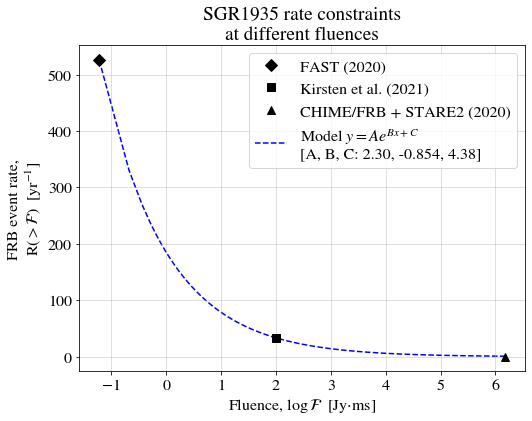

In [8]:
plt.figure(figsize=(8,6))

obs_labels = ['FAST (2020)', 'Kirsten et al. (2021)', 'CHIME/FRB + STARE2 (2020)']
obs_markers = ['D', 's', '^']
for i in range(len(obs_rate_pnts)):
    plt.plot(obs_fluence_pnts[i], obs_rate_pnts[i], 'k', marker=obs_markers[i], 
             label=obs_labels[i], markersize=8, linestyle='None')
    
x_range = np.log10(np.linspace(6e-2, 1.5e6, 10000000))
plt.plot(x_range, ln_model(x_range, *opt), 'b--', label='Model $y=Ae^{Bx+C}$\n[A, B, C: 2.30, -0.854, 4.38]', zorder=1)


plt.xlabel('Fluence, $\mathcal{\log{F}}$  [Jy$\cdot$ms]')
plt.ylabel('FRB event rate,\nR($>\mathcal{F}$)  [yr$^{-1}$]')
plt.title('SGR1935 rate constraints\nat different fluences')
plt.legend()

plt.grid(alpha=0.5)

plt.show()

In [9]:
ln_model(3, *opt)

14.229174440681335

Therefore, we can expect to see about 14 FRBs from SGR1935 per year that have a fluence of 1 kJy$\cdot$ms.

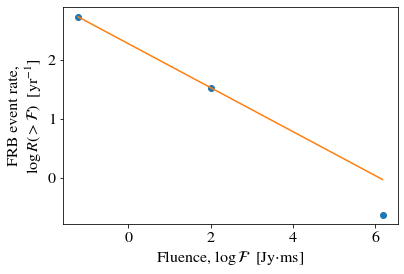

In [10]:
obs_rate_pnts = np.log10([525.6, 33.5, 0.241])
obs_fluence_pnts = np.log10([6e-2, 1e2, 1.5e6])

plt.figure()
plt.plot(obs_fluence_pnts, obs_rate_pnts, 'o')
x_range = np.log10(np.linspace(6e-2, 1.5e6, 10000000))
plt.plot(x_range, np.log10(ln_model(x_range, *opt)))
plt.xlabel('Fluence, $\mathcal{\log{F}}$  [Jy$\cdot$ms]')
plt.ylabel('FRB event rate,\n$\log{R(>\mathcal{F}}$)  [yr$^{-1}$]')
plt.show()

Model needs work but this is a decent starting point.

## Using STARE2 attributes

STARE2 has a FWHM of $70^{o} \pm 5^{o}$. According to their published paper on their 1.5 MJy$\cdot$ms FRB detection from SGR1935 (https://arxiv.org/pdf/2005.10828.pdf), they observed for 448 days before capturing the FRB. Given their FWHM limit, SGR1935 is only visible to STARE2 for 4.67 hours of the day, meaning their total obs. time of SGR1935 is ~2090.67 hours. This gives us an rate for observing a MJy$\cdot$ms FRB from SGR1935 in a year: 

In [11]:
STARE2_FWHM = 70 # degrees

STARE2_SGR1935_time = (STARE2_FWHM/360)*24 # hr/day

STARE2_obs_days = 448

STARE2_tot_obs_time = STARE2_SGR1935_time*STARE2_obs_days
print('Total obs time of SGR1935 by STARE2:', STARE2_tot_obs_time)

Total obs time of SGR1935 by STARE2: 2090.666666666667


In [12]:
annual_hours = 8760 # hrs/year
MJy_rate = annual_hours/STARE2_tot_obs_time

print('MJy ms fluence FRB rate from SGR1935:', MJy_rate)

MJy ms fluence FRB rate from SGR1935: 4.190051020408163


In [13]:
# Obs. data
obs_rate_pnts = [33.5, 4.19]
obs_fluence_pnts = np.log10([1e2, 1.5e6])

In [14]:
def exp_model(x, A, b):
    return A*10**(b*x)

guesses = np.array([1, -.01])
opt, cov = scipy.optimize.curve_fit(exp_model, obs_fluence_pnts, obs_rate_pnts, guesses) 
# print('A, b = {param:.3f}'.format(param=opt))
print('A, b = {0:.3f}, {1:.3f}'.format(opt[0], opt[1]));

A, b = 90.662, -0.216


c:\Users\darby\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


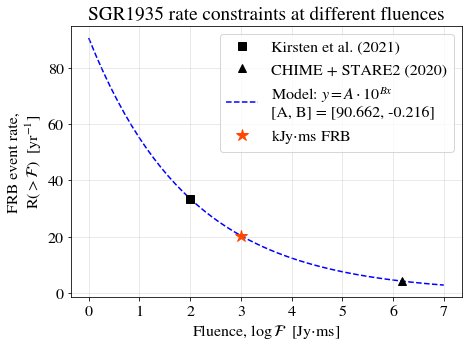

In [15]:
plt.figure(figsize=(7,5))

plt.title('SGR1935 rate constraints at different fluences')

obs_labels = ['Kirsten et al. (2021)', 'CHIME + STARE2 (2020)']
obs_markers = ['s', '^']
for i in range(len(obs_rate_pnts)):
    plt.plot(obs_fluence_pnts[i], obs_rate_pnts[i], 'k', marker=obs_markers[i], 
             label=obs_labels[i], markersize=8, linestyle='None')
xs = np.linspace(*np.log10([1e0, 1e7])) 
plt.plot(xs, exp_model(xs, *opt), 'b--', zorder=1, 
         label='Model: $y=A\cdot10^{Bx}$'+'\n[A, B] = [{0:.3f}, {1:.3f}]'.format(opt[0], opt[1])) ### LABEL BEING WEIRD

plt.xlabel('Fluence, $\mathcal{\log{F}}$  [Jy$\cdot$ms]')
plt.ylabel('FRB event rate,\nR($>\mathcal{F}$)  [yr$^{-1}$]')

plt.plot(3, exp_model(3, *opt), marker='*', markersize=13, c='orangered', label='kJy$\cdot$ms FRB', linestyle='None')

plt.legend()
plt.grid(alpha=0.35)

plt.show()

In [16]:
kJy_rate = exp_model(3, *opt)
print('We can expect to see ~{0:.0f} kJy ms FRBs per year from SGR1935.'.format(kJy_rate))

We can expect to see ~20 kJy ms FRBs per year from SGR1935.


In [ ]:
# Obs. data
obs_rate_pnts = [33.5, 4.19]
obs_fluence_pnts = np.log10([1e2, 1.5e6])

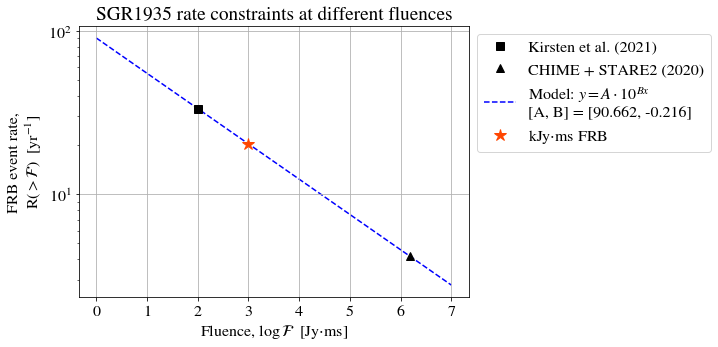

In [20]:
plt.figure(figsize=(7,5))

plt.title('SGR1935 rate constraints at different fluences')

obs_labels = ['Kirsten et al. (2021)', 'CHIME + STARE2 (2020)']
obs_markers = ['s', '^']
for i in range(len(obs_rate_pnts)):
    plt.semilogy(obs_fluence_pnts[i], obs_rate_pnts[i], 'k', marker=obs_markers[i], 
             label=obs_labels[i], markersize=8, linestyle='None')
xs = np.linspace(*np.log10([1e0, 1e7])) 
plt.plot(xs, exp_model(xs, *opt), 'b--', zorder=1, 
         label='Model: $y=A\cdot10^{Bx}$'+'\n[A, B] = [{0:.3f}, {1:.3f}]'.format(opt[0], opt[1])) ### LABEL BEING WEIRD

plt.xlabel('Fluence, $\mathcal{\log{F}}$  [Jy$\cdot$ms]')
plt.ylabel('FRB event rate,\nR($>\mathcal{F}$)  [yr$^{-1}$]')

plt.plot(3, exp_model(3, *opt), marker='*', markersize=13, c='orangered', label='kJy$\cdot$ms FRB', linestyle='None')

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.grid()

plt.show()